In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data set(merged)

In [4]:
import os
print(os.getcwd())

C:\Users\hp\Desktop\automatedreviewratingsystem


In [5]:
import os
os.chdir("C:/Users/hp/Desktop/automatedreviewratingsystem/data")
print(os.getcwd())


C:\Users\hp\Desktop\automatedreviewratingsystem\data


In [4]:
df = pd.read_csv("cleaned_dataset/cleaned_orginal data.csv")

In [5]:
df.head()

,review text,overall,review_length
0,No issues.,4,2
1,"Purchased this for my device, it worked as adv...",5,31
2,it works as expected. I should have sprung for...,4,31
3,This think has worked out great.Had a diff. br...,5,66
4,"Bought it with Retail Packaging, arrived legit...",5,52


In [48]:
df.tail()

,review text,overall,review_length
30924,best kept secret 3rd time staying charm \tnot ...,5,109
30925,great location price view hotel great quick pl...,4,39
30926,ok just looks nice modern outside \tdesk staff...,2,63
30927,hotel theft ruined vacation hotel opened sept ...,1,781
30928,people talking \tca n't believe excellent rati...,2,90


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30929 entries, 0 to 30928
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review text    30929 non-null  object
 1   overall        30929 non-null  int64 
 2   review_length  30929 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 725.0+ KB


# cheking nullvalues

In [50]:
df.isnull().sum()

review text      0
overall          0
review_length    0
dtype: int64

# duplicates

In [51]:
df = df.drop_duplicates()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30929 entries, 0 to 30928
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review text    30929 non-null  object
 1   overall        30929 non-null  int64 
 2   review_length  30929 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 725.0+ KB


In [53]:
df.shape

(30929, 3)

In [54]:
if 'reviewText' in df.columns:
    df['reviewText'] = df['reviewText'].astype(str)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30929 entries, 0 to 30928
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review text    30929 non-null  object
 1   overall        30929 non-null  int64 
 2   review_length  30929 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 725.0+ KB


In [56]:
print(df['overall'].value_counts())

overall
5    15569
4     7107
1     3265
3     2763
2     2225
Name: count, dtype: int64


# visualization using matplotlib

# 1,Histogram of review lengths

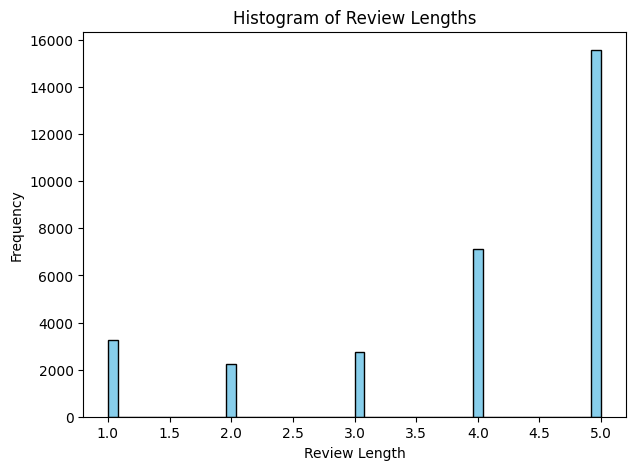

In [57]:
plt.figure(figsize=(7,5))
plt.hist(df['overall'], bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

# 2,barchart of ratings

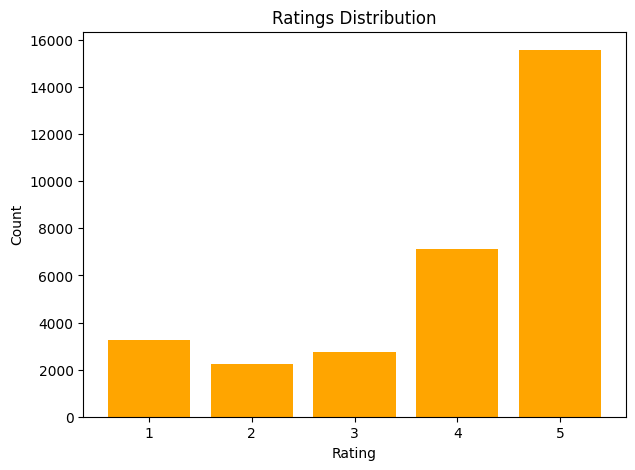

In [21]:
rating_counts = df['overall'].value_counts()
plt.figure(figsize=(7,5))
plt.bar(rating_counts.index, rating_counts.values, color='orange')
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# 3,Boxplot of Review Length per Rating

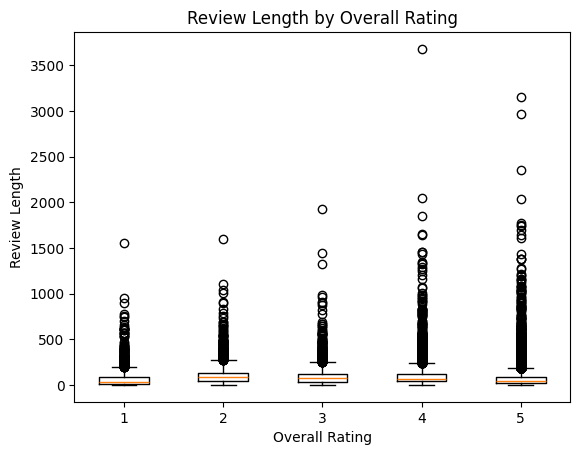

In [36]:
plt.boxplot(
    [df[df['overall'] == i]['review_length'] for i in sorted(df['overall'].unique())],
    tick_labels=sorted(df['overall'].unique())
)
plt.title("Review Length by Overall Rating")
plt.xlabel("Overall Rating")
plt.ylabel("Review Length")
plt.show()


# 4,Violin Plot (Density + Distribution)seaborn

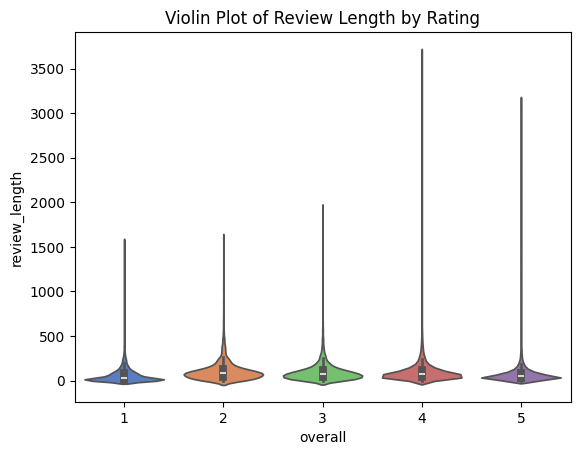

In [27]:
sns.violinplot(x='overall', y='review_length', data=df, hue='overall', palette="muted", legend=False)
plt.title("Violi n Plot of Review Length by Rating")
plt.show()

#word frequency- seaborn

In [29]:
#filtering 5star reviews
reviews_5star = df[df['overall'] == 5]['review text']

# histogram using seaborn

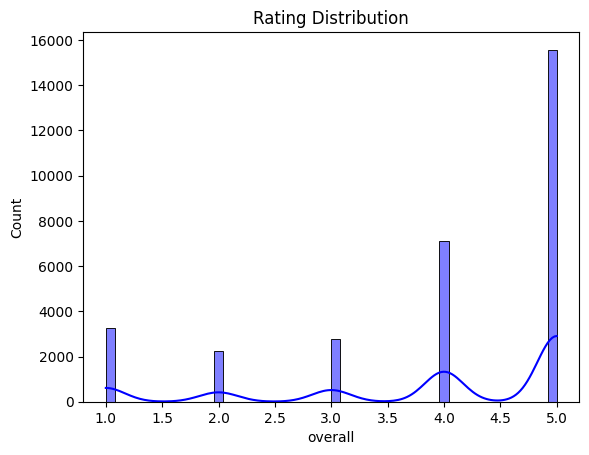

In [60]:
sns.histplot(df['overall'], bins=50, kde=True, color="blue")
plt.title("Rating Distribution")
plt.show()

# Rating Distribution(Bar Chart) using seaborn

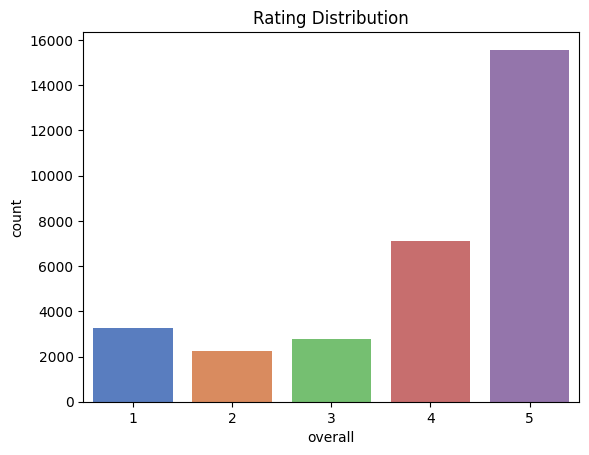

In [33]:
sns.countplot(x="overall", data=df, hue="overall", palette="muted", legend=False)
plt.title("Rating Distribution")
plt.show()

# boxplot using seaborn

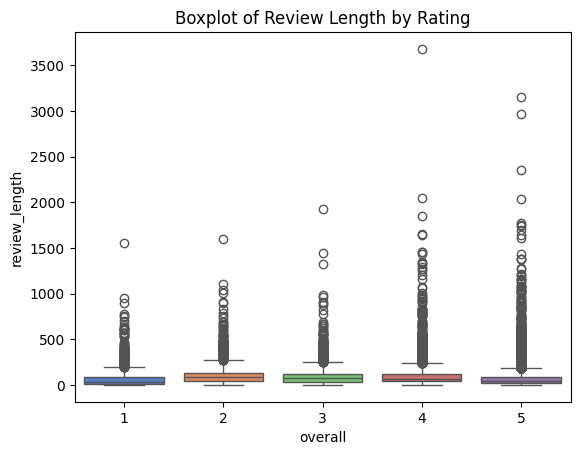

In [34]:
sns.boxplot(x='overall', y='review_length', data=df, hue='overall', palette="muted", legend=False)
plt.title("Boxplot of Review Length by Rating")
plt.show()

# VISUALIZATION  OF BALANCED DATASET

In [7]:
balanced_df = pd.read_csv("cleaned_dataset/balanced_dataset.csv")

In [8]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review text    10000 non-null  object
 1   overall        10000 non-null  int64 
 2   review_length  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [9]:
#balanced data count of each rating
print(balanced_df['overall'].value_counts())

overall
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64


In [10]:
#checking percentage 
rating_counts = pd.Series({5: 2050, 4: 2050, 3: 2050, 2: 2050, 1: 2050})
rating_percent = (rating_counts / rating_counts.sum()) * 100
print(rating_percent)


5    20.0
4    20.0
3    20.0
2    20.0
1    20.0
dtype: float64


# 1,histogram using seaborn¶

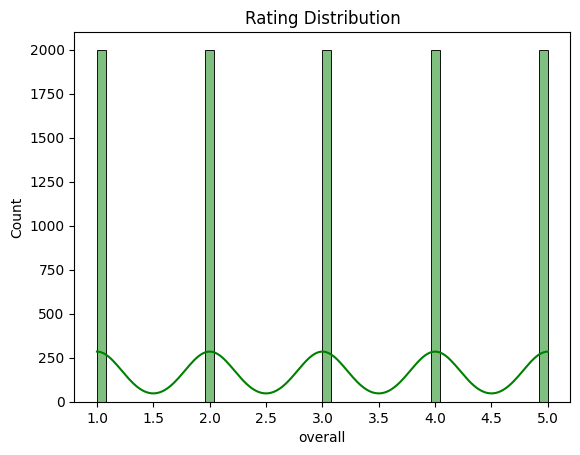

In [11]:
sns.histplot(balanced_df['overall'], bins=50, kde=True, color="green")
plt.title("Rating Distribution")
plt.show()

# 2,barchart

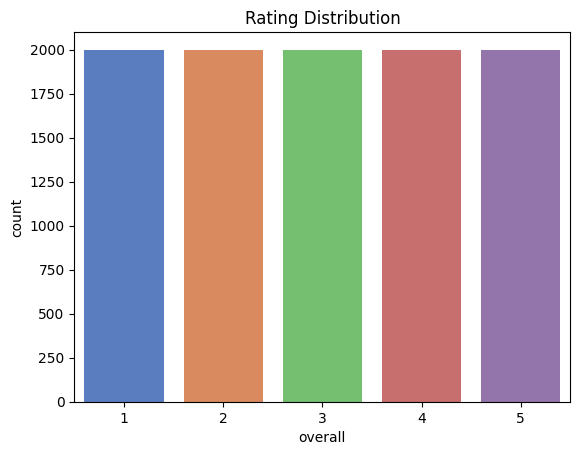

In [12]:
sns.countplot(x="overall", data=balanced_df, hue="overall", palette="muted", legend=False)
plt.title("Rating Distribution")
plt.show()

# 3,boxplot using seaborn

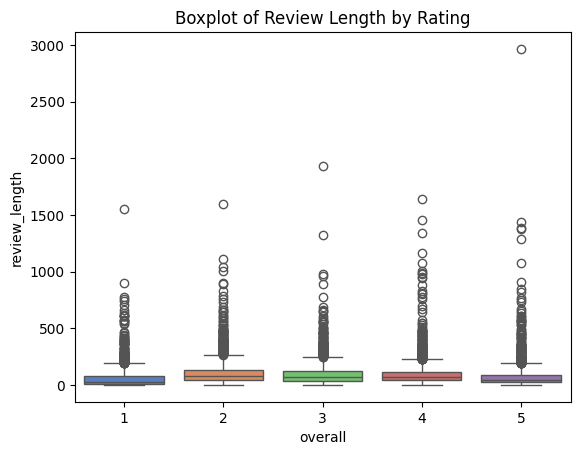

In [13]:
sns.boxplot(x='overall', y='review_length', data=balanced_df, hue='overall', palette="muted", legend=False)
plt.title("Boxplot of Review Length by Rating")
plt.show()

# 4,Violin Plot (Density + Distribution)seaborn

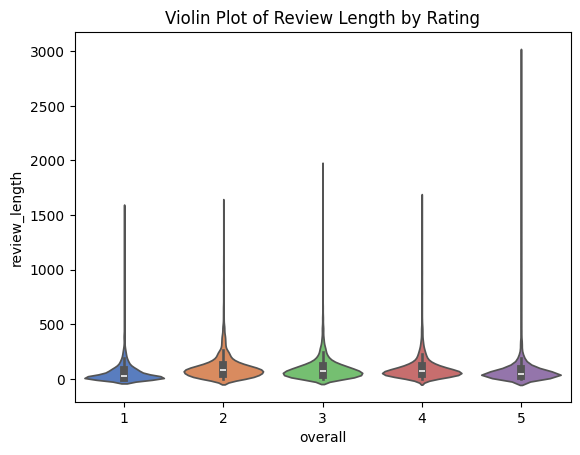

In [15]:
sns.violinplot(x='overall', y='review_length', data=balanced_df, hue='overall', palette="muted", legend=False)
plt.title("Violin Plot of Review Length by Rating")
plt.show()

# visualization of imbalanced dataset

In [16]:
imbalanced_df = pd.read_csv("cleaned_dataset/imbalanced_dataset.csv")

In [17]:
imbalanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review text    10000 non-null  object
 1   overall        10000 non-null  int64 
 2   review_length  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [18]:
#imbalanced data count of each rating
print(imbalanced_df['overall'].value_counts())

overall
5    3000
4    2500
3    2000
2    1500
1    1000
Name: count, dtype: int64


In [19]:
#checking percentage 
rating_counts = pd.Series({5: 6210, 4: 5057, 3: 4222, 2: 2975, 1: 2215})
rating_percent = (rating_counts / rating_counts.sum()) * 100
print(rating_percent)

5    30.030466
4    24.454761
3    20.416848
2    14.386576
1    10.711350
dtype: float64


# 1,histogram using seaborn

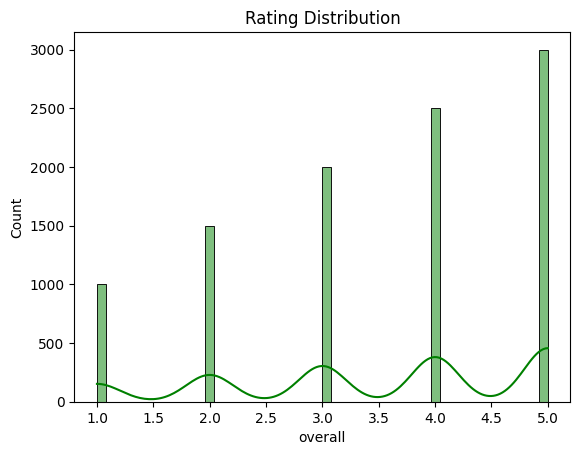

In [20]:
sns.histplot(imbalanced_df['overall'], bins=50, kde=True, color="green")
plt.title("Rating Distribution")
plt.show()

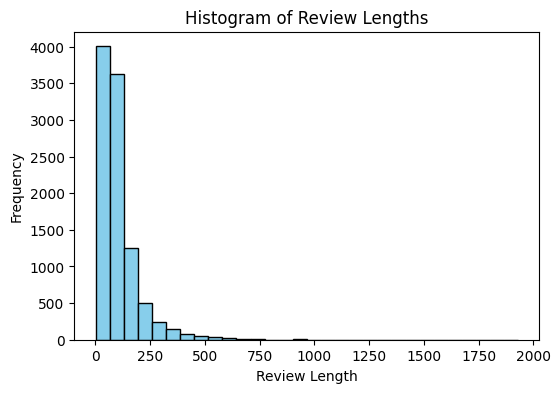

In [21]:
plt.figure(figsize=(6,4))
plt.hist(imbalanced_df['review_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# 2,barchart

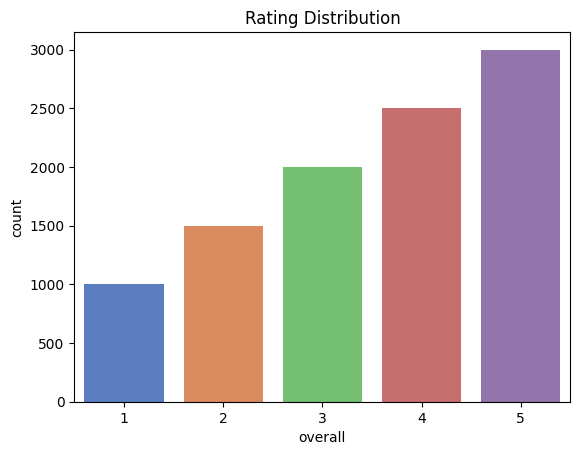

In [22]:
sns.countplot(x="overall", data=imbalanced_df, hue="overall", palette="muted", legend=False)
plt.title("Rating Distribution")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_22320\2717864790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='overall', y='review_length', data=imbalanced_df, palette='plasma')


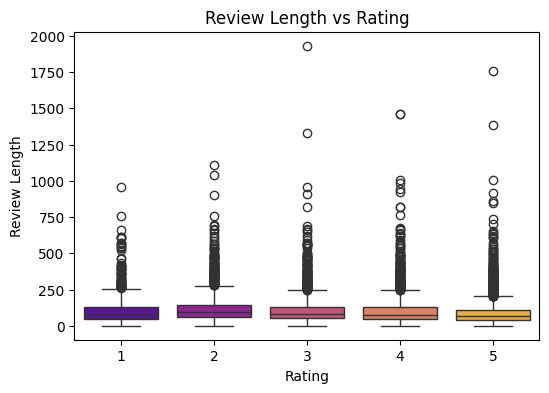

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x='overall', y='review_length', data=imbalanced_df, palette='plasma')
plt.title('Review Length vs Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

# 3,boxplot using seaborn

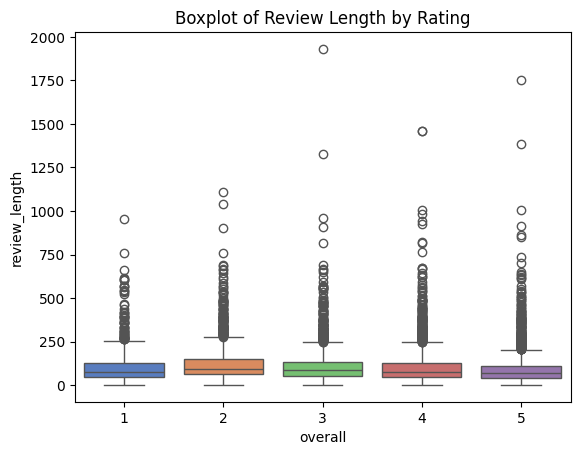

In [24]:
sns.boxplot(x='overall', y='review_length', data=imbalanced_df, hue='overall', palette="muted", legend=False)
plt.title("Boxplot of Review Length by Rating")
plt.show()

# 4,Violin Plot (Density + Distribution)seaborn

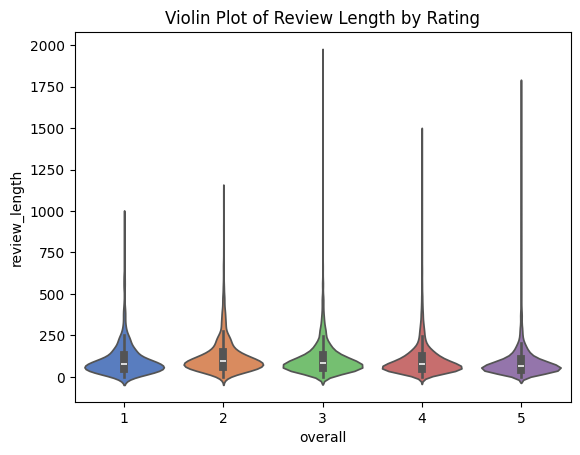

In [25]:
sns.violinplot(x='overall', y='review_length', data=imbalanced_df, hue='overall', palette="muted", legend=False)
plt.title("Violin Plot of Review Length by Rating")
plt.show()

# NLP 

# importing libraries

In [26]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

# loading and preprocessing the balanced data

In [27]:
balanced_df.shape

(10000, 3)

In [28]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review text    10000 non-null  object
 1   overall        10000 non-null  int64 
 2   review_length  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


# lowercasing, removing urls&html tags, removing special characters,numbers,punctuation,emojis


In [29]:
def clean_text(text):
     text = text.lower()
     text = re.sub(r"http\S+|www\S+", "", text)   
     text = re.sub(r"<.*?>", "", text) 
     text = re.sub(r"[^a-z\s]", " ", text)
     text = re.sub(r"\d+", " ", text)#numbers
     text = text.encode('ascii', 'ignore').decode('utf-8')
     text = re.sub(r"\s+", " ", text).strip()    #extra spaces
     return text

In [30]:
balanced_df['reviews']=balanced_df['review text'].apply(clean_text)

In [31]:
balanced_df.info()
balanced_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review text    10000 non-null  object
 1   overall        10000 non-null  int64 
 2   review_length  10000 non-null  int64 
 3   reviews        10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


,review text,overall,review_length,reviews
0,EXCELLENT,1,1,excellent
1,I was taking a tour in Hangzhou China and whil...,1,147,i was taking a tour in hangzhou china and whil...
2,sari sabji basi thi rice half Bowl bhi nhi tha...,1,29,sari sabji basi thi rice half bowl bhi nhi tha...
3,I haven't figured out yet if I'm a dummy or if...,1,170,i haven t figured out yet if i m a dummy or if...
4,very good delevery.<br/>Thank you so much part...,1,7,very good delevery thank you so much partner


#droping existing review text column

In [32]:
balanced_df = balanced_df.drop(columns=['review text'])

In [33]:
balanced_df.tail()

,overall,review_length,reviews
9995,5,99,fantastic treat estherea jewel reception desk ...
9996,5,39,there are lots of sd memory cards on the marke...
9997,5,21,i purchased this product for my samsung galxy ...
9998,5,16,be kind and thoughtful to those left behind lo...
9999,5,4,i don t like food


#recalculating review length after cleaning

In [34]:
balanced_df['review_length'] = balanced_df['reviews'].str.split().apply(len)

# removing stopwords and applying lemmatization

In [35]:
#spliting string to words
balanced_df['words']=balanced_df['reviews'].apply(lambda x: x.split())

In [36]:
balanced_df.tail()

,overall,review_length,reviews,words
9995,5,96,fantastic treat estherea jewel reception desk ...,"[fantastic, treat, estherea, jewel, reception,..."
9996,5,39,there are lots of sd memory cards on the marke...,"[there, are, lots, of, sd, memory, cards, on, ..."
9997,5,21,i purchased this product for my samsung galxy ...,"[i, purchased, this, product, for, my, samsung..."
9998,5,16,be kind and thoughtful to those left behind lo...,"[be, kind, and, thoughtful, to, those, left, b..."
9999,5,5,i don t like food,"[i, don, t, like, food]"


In [37]:
import nltk
from nltk.corpus import stopwords


In [38]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\hp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\hp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\hp/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
balanced_df.tail()

,overall,review_length,reviews,words
9995,5,96,fantastic treat estherea jewel reception desk ...,"[fantastic, treat, estherea, jewel, reception,..."
9996,5,39,there are lots of sd memory cards on the marke...,"[there, are, lots, of, sd, memory, cards, on, ..."
9997,5,21,i purchased this product for my samsung galxy ...,"[i, purchased, this, product, for, my, samsung..."
9998,5,16,be kind and thoughtful to those left behind lo...,"[be, kind, and, thoughtful, to, those, left, b..."
9999,5,5,i don t like food,"[i, don, t, like, food]"


#removing stopwords and lemmatizing

In [40]:
stop_words = set(stopwords.words('english'))


In [41]:
def clean_words_list(words):
    words = [w for w in words if w not in stop_words]
    
    return " ".join(words)

#applying to words and saving back to reviews(joining)

In [42]:
balanced_df['reviews'] = balanced_df['words'].apply(clean_words_list)

In [43]:
balanced_df.tail()

,overall,review_length,reviews,words
9995,5,96,fantastic treat estherea jewel reception desk ...,"[fantastic, treat, estherea, jewel, reception,..."
9996,5,39,lots sd memory cards market today cheaper alwa...,"[there, are, lots, of, sd, memory, cards, on, ..."
9997,5,21,purchased product samsung galxy tab pro far fl...,"[i, purchased, this, product, for, my, samsung..."
9998,5,16,kind thoughtful left behind loads helpful info...,"[be, kind, and, thoughtful, to, those, left, b..."
9999,5,5,like food,"[i, don, t, like, food]"


In [44]:
balanced_df.head()

,overall,review_length,reviews,words
0,1,1,excellent,[excellent]
1,1,146,taking tour hangzhou china shooting canon card...,"[i, was, taking, a, tour, in, hangzhou, china,..."
2,1,29,sari sabji basi thi rice half bowl bhi nhi tha...,"[sari, sabji, basi, thi, rice, half, bowl, bhi..."
3,1,179,figured yet dummy defective card know card bad...,"[i, haven, t, figured, out, yet, if, i, m, a, ..."
4,1,8,good delevery thank much partner,"[very, good, delevery, thank, you, so, much, p..."


In [45]:
balanced_df.head()

,overall,review_length,reviews,words
0,1,1,excellent,[excellent]
1,1,146,taking tour hangzhou china shooting canon card...,"[i, was, taking, a, tour, in, hangzhou, china,..."
2,1,29,sari sabji basi thi rice half bowl bhi nhi tha...,"[sari, sabji, basi, thi, rice, half, bowl, bhi..."
3,1,179,figured yet dummy defective card know card bad...,"[i, haven, t, figured, out, yet, if, i, m, a, ..."
4,1,8,good delevery thank much partner,"[very, good, delevery, thank, you, so, much, p..."


#    SAVING

In [397]:
balanced_df.to_csv("cleaned_dataset/balanced_df.csv", index=False)


# LMMATIZATIONM

In [6]:
balanced_df = pd.read_csv("cleaned_dataset/balanced_df.csv")

In [46]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [47]:
nltk.data.path.append(r'C:\Users\hp\nltk_data')

In [48]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\hp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\hp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\hp/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\hp/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [49]:
lemmatizer = WordNetLemmatizer()

In [50]:
def clean_words_list(text):
    from nltk.tokenize import word_tokenize
    words = word_tokenize(str(text))
    lemmatized = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(lemmatized)

In [51]:
balanced_df['lemmatized_words'] = balanced_df['reviews'].apply(clean_words_list)

#recheking length

In [52]:
# Check length of reviews vs lemmatized text

balanced_df['lemmatized_length'] = balanced_df['lemmatized_words'].apply(lambda x: len(str(x).split()))
balanced_df[['review_length', 'lemmatized_length']].head(10)

,review_length,lemmatized_length
0,1,1
1,146,71
2,29,24
3,179,75
4,8,5
5,1,1
6,143,129
7,3,1
8,1,1
9,4,3


In [53]:
# Compare lengths statistically
print("Original review length stats:")
print(balanced_df['review_length'].describe())

print("\nLemmatized review length stats:")
print(balanced_df['lemmatized_length'].describe())


Original review length stats:
count    10000.00000
mean        90.33970
std        117.36647
min          0.00000
25%         26.00000
50%         63.00000
75%        111.00000
max       2974.00000
Name: review_length, dtype: float64

Lemmatized review length stats:
count    10000.000000
mean        78.887200
std         97.423062
min          0.000000
25%         18.000000
50%         55.000000
75%        101.000000
max       1889.000000
Name: lemmatized_length, dtype: float64


In [54]:
balanced_df.tail()

,overall,review_length,reviews,words,lemmatized_words,lemmatized_length
9995,5,96,fantastic treat estherea jewel reception desk ...,"[fantastic, treat, estherea, jewel, reception,...",fantastic treat estherea jewel reception desk ...,94
9996,5,39,lots sd memory cards market today cheaper alwa...,"[there, are, lots, of, sd, memory, cards, on, ...",lot sd memory card market today cheaper always...,26
9997,5,21,purchased product samsung galxy tab pro far fl...,"[i, purchased, this, product, for, my, samsung...",purchased product samsung galxy tab pro far fl...,11
9998,5,16,kind thoughtful left behind loads helpful info...,"[be, kind, and, thoughtful, to, those, left, b...",kind thoughtful left behind load helpful infor...,9
9999,5,5,like food,"[i, don, t, like, food]",like food,2


In [55]:
balanced_df.isnull().sum()

overall              0
review_length        0
reviews              0
words                0
lemmatized_words     0
lemmatized_length    0
dtype: int64

In [56]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   overall            10000 non-null  int64 
 1   review_length      10000 non-null  int64 
 2   reviews            10000 non-null  object
 3   words              10000 non-null  object
 4   lemmatized_words   10000 non-null  object
 5   lemmatized_length  10000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


In [57]:
balanced_df.shape

(10000, 6)

# droping columns

In [58]:
balanced_df = balanced_df.drop(columns=['review_length'])

In [59]:
balanced_df = balanced_df.drop(columns=['words'])

In [60]:
balanced_df = balanced_df.drop(columns=['reviews'])

In [61]:
print(balanced_df['overall'].value_counts())

overall
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64


In [62]:
balanced_df.head()

,overall,lemmatized_words,lemmatized_length
0,1,excellent,1
1,1,taking tour hangzhou china shooting canon card...,71
2,1,sari sabji basi thi rice half bowl bhi nhi tha...,24
3,1,figured yet dummy defective card know card bad...,75
4,1,good delevery thank much partner,5


In [63]:
balanced_df.tail()

,overall,lemmatized_words,lemmatized_length
9995,5,fantastic treat estherea jewel reception desk ...,94
9996,5,lot sd memory card market today cheaper always...,26
9997,5,purchased product samsung galxy tab pro far fl...,11
9998,5,kind thoughtful left behind load helpful infor...,9
9999,5,like food,2


# filtering reviews

#filtering reviews less than 3 words and long than 200

In [64]:


# Short reviews (length 3-50)
short_reviews = balanced_df[(balanced_df['lemmatized_length'] >= 0) & (balanced_df['lemmatized_length'] <= 3)]
print("Short reviews:")
print(short_reviews['lemmatized_words'].head(10))  
# Long reviews (length 151-200)
long_reviews = balanced_df[(balanced_df['lemmatized_length'] > 150) & (balanced_df['lemmatized_length'] <= 200)]
print("\nLong reviews:")
print(long_reviews['lemmatized_words'].head(10))  


Short reviews:
0             excellent
5                  good
7                  like
8                thanks
9      smelly pav bhaji
12                 good
14           nice taste
23    delivery guy good
32        packing worst
33     kulcha cook well
Name: lemmatized_words, dtype: object

Long reviews:
18     worst hotel experience thinking booking room h...
105    excellent location cheap bed service sydney mo...
108    horrible experience wished went website booked...
122    disappointed extremely disappointed stay jayak...
153    stay thief stayed boyfriend night spending day...
163    n fooled price location grade room damrak hote...
178    waste vacation read really half star resort ra...
200    vacation disaster breeze punta cana boyfriend ...
221    miss stayed hotel friend weekend th st septemb...
277    awful traveling boyfriend thought dorm amsterd...
Name: lemmatized_words, dtype: object


In [65]:
balanced_df = balanced_df[(balanced_df['lemmatized_length']>=3)&(balanced_df['lemmatized_length']<=200)]

In [66]:
# Short reviews (length 3-50)
short_reviews = balanced_df[(balanced_df['lemmatized_length'] >= 0) & (balanced_df['lemmatized_length'] <= 3)]
print("Short reviews:")
print(short_reviews['lemmatized_words'].head(10))  # first 10 for example

# Long reviews (length 151-200)
long_reviews = balanced_df[(balanced_df['lemmatized_length'] > 150) & (balanced_df['lemmatized_length'] <= 200)]
print("\nLong reviews:")
print(long_reviews['lemmatized_words'].head(10))  # first 10 for example


Short reviews:
9              smelly pav bhaji
23            delivery guy good
33             kulcha cook well
43         topping served bread
45        delivery boy pathetic
94               cold loss item
156            worst pulao ever
212            little bit spicy
219           supar dost thanks
236    late delivery restaurant
Name: lemmatized_words, dtype: object

Long reviews:
18     worst hotel experience thinking booking room h...
105    excellent location cheap bed service sydney mo...
108    horrible experience wished went website booked...
122    disappointed extremely disappointed stay jayak...
153    stay thief stayed boyfriend night spending day...
163    n fooled price location grade room damrak hote...
178    waste vacation read really half star resort ra...
200    vacation disaster breeze punta cana boyfriend ...
221    miss stayed hotel friend weekend th st septemb...
277    awful traveling boyfriend thought dorm amsterd...
Name: lemmatized_words, dtype: object


In [67]:
#droping words column
#balanced_df = balanced_df.drop(columns=['words'])

In [68]:
print(balanced_df['overall'].value_counts())

overall
5    1819
4    1783
3    1734
2    1683
1    1587
Name: count, dtype: int64


In [69]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8606 entries, 1 to 9998
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   overall            8606 non-null   int64 
 1   lemmatized_words   8606 non-null   object
 2   lemmatized_length  8606 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 268.9+ KB


# rechecking lngth

In [70]:
# Add a new column for word count
balanced_df['lemmatized_length'] = balanced_df['lemmatized_words'].apply(lambda x: len(str(x).split()))


In [71]:
balanced_df.tail()

,overall,lemmatized_words,lemmatized_length
9994,5,good hotel stayed hotel recently time june saw...,51
9995,5,fantastic treat estherea jewel reception desk ...,94
9996,5,lot sd memory card market today cheaper always...,26
9997,5,purchased product samsung galxy tab pro far fl...,11
9998,5,kind thoughtful left behind load helpful infor...,9


#reseting index

In [72]:
balanced_df = balanced_df.reset_index(drop=True)

In [73]:
balanced_df.head()

,overall,lemmatized_words,lemmatized_length
0,1,taking tour hangzhou china shooting canon card...,71
1,1,sari sabji basi thi rice half bowl bhi nhi tha...,24
2,1,figured yet dummy defective card know card bad...,75
3,1,good delevery thank much partner,5
4,1,avoid stayed hotel way europe japan booked nig...,129


In [74]:
balanced_df.tail()

,overall,lemmatized_words,lemmatized_length
8601,5,good hotel stayed hotel recently time june saw...,51
8602,5,fantastic treat estherea jewel reception desk ...,94
8603,5,lot sd memory card market today cheaper always...,26
8604,5,purchased product samsung galxy tab pro far fl...,11
8605,5,kind thoughtful left behind load helpful infor...,9


In [75]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8606 entries, 0 to 8605
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   overall            8606 non-null   int64 
 1   lemmatized_words   8606 non-null   object
 2   lemmatized_length  8606 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 201.8+ KB


In [76]:
print(balanced_df['overall'].value_counts())

overall
5    1819
4    1783
3    1734
2    1683
1    1587
Name: count, dtype: int64


In [77]:
balanced_df.tail()

,overall,lemmatized_words,lemmatized_length
8601,5,good hotel stayed hotel recently time june saw...,51
8602,5,fantastic treat estherea jewel reception desk ...,94
8603,5,lot sd memory card market today cheaper always...,26
8604,5,purchased product samsung galxy tab pro far fl...,11
8605,5,kind thoughtful left behind load helpful infor...,9


#saving

In [78]:
balanced_df.to_csv("cleaned_dataset/New folder/new_cleaned_data.csv", index=False)

# merging new cleaned dataset to existing data set to make balance

In [80]:
df_new= pd.read_csv("cleaned_dataset/New folder/last_data.csv")

In [81]:
balanced_df= pd.read_csv("cleaned_dataset/New folder/new_cleaned_data.csv")

In [82]:
df_new.tail()

,overall,cleaned_reviews,review_length
9995,5,using nupro year pleased result nupro balanced...,34
9996,5,good quality dog eat many dry dog food turn nose,10
9997,5,fed trio min american eskimo french bulldog bl...,43
9998,5,complaint purchase delicious nut shell half wa...,24
9999,5,store manager always interested customer would...,71


In [83]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   overall          10000 non-null  int64 
 1   cleaned_reviews  10000 non-null  object
 2   review_length    10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


#filtering new dataset reviews

In [84]:
df_new = df_new[(df_new['review_length']>=3)&(df_new['review_length']<=200)]

In [85]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   overall          10000 non-null  int64 
 1   cleaned_reviews  10000 non-null  object
 2   review_length    10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


#resetting index

In [86]:
df_new = df_new.reset_index(drop=True)

#renaming a column to match and combine

In [87]:
df_new.head()

,overall,cleaned_reviews,review_length
0,1,taste much like cherry flavored cough syrup dr...,16
1,1,note purchased box july may amazon must used d...,171
2,1,first little disappointed got one pouch try ta...,41
3,1,needed filler item figured get food sure use w...,46
4,1,highly recommended hei customer like fragmenta...,14


In [88]:
df_new= df_new.rename(columns={"cleaned_reviews": "reviews"})

In [89]:
balanced_df= balanced_df.rename(columns={"lemmatized_words": "reviews"})

In [90]:
balanced_df= balanced_df.rename(columns={"lemmatized_length": "review_length"})

In [91]:
df_new.head()

,overall,reviews,review_length
0,1,taste much like cherry flavored cough syrup dr...,16
1,1,note purchased box july may amazon must used d...,171
2,1,first little disappointed got one pouch try ta...,41
3,1,needed filler item figured get food sure use w...,46
4,1,highly recommended hei customer like fragmenta...,14


In [92]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8606 entries, 0 to 8605
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   overall        8606 non-null   int64 
 1   reviews        8606 non-null   object
 2   review_length  8606 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 201.8+ KB


#combining two tables

In [93]:
df_1= df_new[["overall", "reviews", "review_length"]]
df2= balanced_df[["overall", "reviews", "review_length"]]

In [94]:
final_df = pd.concat([df_1, df2], ignore_index=True)

In [95]:
final_df.tail()

,overall,reviews,review_length
18601,5,good hotel stayed hotel recently time june saw...,51
18602,5,fantastic treat estherea jewel reception desk ...,94
18603,5,lot sd memory card market today cheaper always...,26
18604,5,purchased product samsung galxy tab pro far fl...,11
18605,5,kind thoughtful left behind load helpful infor...,9


In [96]:
print(final_df['overall'].value_counts())

overall
5    3819
4    3783
3    3734
2    3683
1    3587
Name: count, dtype: int64


#duplicates and null

In [97]:
final_df = final_df.drop_duplicates(subset=["reviews"])

In [98]:
print(final_df.isnull().sum())

overall          0
reviews          0
review_length    0
dtype: int64


In [99]:
print(final_df['overall'].value_counts())

overall
5    3807
4    3779
3    3716
2    3671
1    3585
Name: count, dtype: int64


#balancing(downsampling)

In [100]:
min_count = final_df["overall"].value_counts().min()
df_balanced = (
    final_df.groupby("overall", group_keys=False)
               .apply(lambda x: x.sample(n=min_count, random_state=42))
               .reset_index(drop=True))

C:\Users\hp\AppData\Local\Temp\ipykernel_22320\2254940881.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_count, random_state=42))


In [101]:
print(df_balanced['overall'].value_counts())

overall
1    3585
2    3585
3    3585
4    3585
5    3585
Name: count, dtype: int64


In [102]:
df_balanced = df_balanced.drop_duplicates(subset=["reviews"])

# detailing the new preprocessed, cleaned,balanced data set

In [103]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17925 entries, 0 to 17924
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   overall        17925 non-null  int64 
 1   reviews        17925 non-null  object
 2   review_length  17925 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 420.2+ KB


In [104]:
df_balanced.head()

,overall,reviews,review_length
0,1,disappointing booked hotel based review read d...,93
1,1,horrible ruin name giving type food,6
2,1,honey raw represented product label impossible...,20
3,1,ordered pack pay attention opened package real...,61
4,1,horrific despite friendly assistance time book...,65


In [105]:
df_balanced.tail()

,overall,reviews,review_length
17920,5,great resort great vaction stayed night thoght...,76
17921,5,ordered granddaughter healthy breakfast one pa...,8
17922,5,make great margarita use recipe got bartender ...,14
17923,5,never find product really want use travel good...,23
17924,5,memory card fast come provides easy file trans...,15


In [106]:
df_balanced.shape

(17925, 3)

In [107]:
print(df_balanced['overall'].value_counts())

overall
1    3585
2    3585
3    3585
4    3585
5    3585
Name: count, dtype: int64


# visualization

# Bar plot:Review count per rating

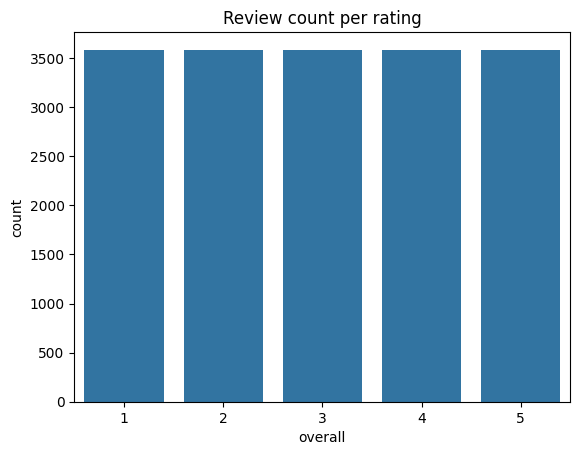

In [108]:
sns.countplot(x="overall", data=df_balanced)
plt.title("Review count per rating")
plt.show()

# Box plot:word count distribution

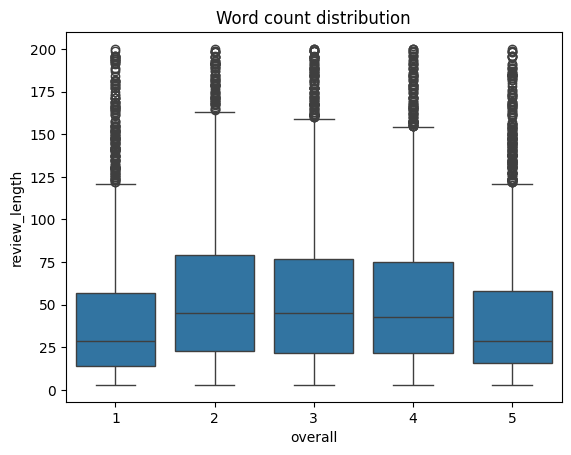

In [109]:
sns.boxplot(x="overall", y="review_length", data=df_balanced)
plt.title("Word count distribution")
plt.show()

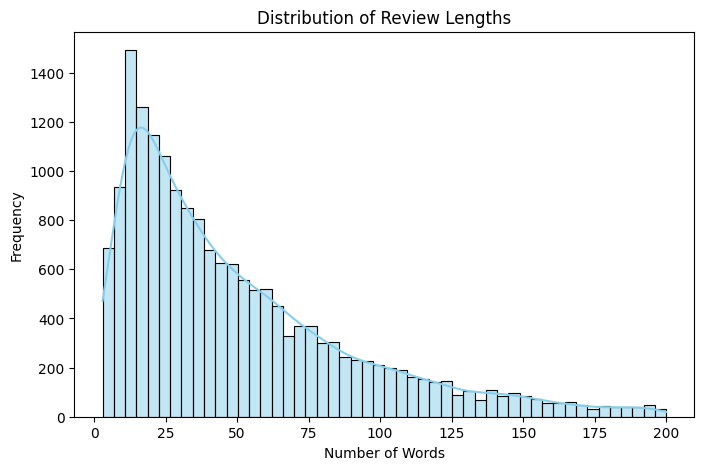

In [110]:
# 2. Review Length Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_balanced['review_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# displaying samples

In [111]:
for rating in sorted(df_balanced["overall"].unique()):
    print(f"\n⭐Rating {rating} Sample Reviews:")
    print(df_balanced[df_balanced["overall"] == rating]["reviews"].head(4).to_list())


⭐Rating 1 Sample Reviews:
['disappointing booked hotel based review read disappointed booked superior room paying price couple given room big house double bed single travelling companion given single room foot square floor space shower flooded room used complained immediately reception staff unhelpful saying hotel fully booked duty manager able speak day manager changed room descent sized double filthy bath hair nail clipping carpet room bedding arrive handed duvet cover separately left making plus hotel located nice area amsterdam park hotel lovely walk centre hotel close needed refurbishment november got distinct feeling staff lost job properly certainly return', 'horrible ruin name giving type food', 'honey raw represented product label impossible read full web page taste texture definitely heated pale shadow raw star thistle honey', 'ordered pack pay attention opened package realized today received wrong item received langers cranberry juice cocktail concentrate lot cheaper langer

In [135]:
df_balanced

,overall,reviews
0,1,disappointing booked hotel based review read d...
1,1,horrible ruin name giving type food
2,1,honey raw represented product label impossible...
3,1,ordered pack pay attention opened package real...
4,1,horrific despite friendly assistance time book...
...,...,...
17920,5,great resort great vaction stayed night thoght...
17921,5,ordered granddaughter healthy breakfast one pa...
17922,5,make great margarita use recipe got bartender ...
17923,5,never find product really want use travel good...


In [113]:
df_balanced = df_balanced.drop('review_length', axis=1)

In [114]:
df_balanced

,overall,reviews
0,1,disappointing booked hotel based review read d...
1,1,horrible ruin name giving type food
2,1,honey raw represented product label impossible...
3,1,ordered pack pay attention opened package real...
4,1,horrific despite friendly assistance time book...
...,...,...
17920,5,great resort great vaction stayed night thoght...
17921,5,ordered granddaughter healthy breakfast one pa...
17922,5,make great margarita use recipe got bartender ...
17923,5,never find product really want use travel good...


# train test split

In [115]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17925 entries, 0 to 17924
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   overall  17925 non-null  int64 
 1   reviews  17925 non-null  object
dtypes: int64(1), object(1)
memory usage: 280.2+ KB


In [116]:
import sys
print(sys.executable)

C:\Users\hp\anaconda3\envs\myenv\python.exe


In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#importing input features

In [118]:
X = df_balanced['reviews']        
y = df_balanced['overall']        

# train test split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [120]:
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print("\nClass distribution in train set:")
print(y_train.value_counts())
print("\nClass distribution in test set:")
print(y_test.value_counts())

Training samples: 14340
Testing samples: 3585

Class distribution in train set:
overall
2    2868
5    2868
3    2868
4    2868
1    2868
Name: count, dtype: int64

Class distribution in test set:
overall
5    717
2    717
4    717
3    717
1    717
Name: count, dtype: int64


# vectorization

In [121]:
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [122]:
print("Train shape:", X_train_vec.shape)
print("Test shape:", X_test_vec.shape)

Train shape: (14340, 10000)
Test shape: (3585, 10000)


# imbalanced data preprocessing and visualization

# training

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [124]:
#initialising models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

In [125]:
#training
results = {}
for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)

    acc = accuracy_score(y_test, preds)
    print(f" Accuracy for {name}: {acc:.4f}")
    print(classification_report(y_test, preds))
    
    results[name] = (model, acc)


 Training Logistic Regression...
 Accuracy for Logistic Regression: 0.4703
              precision    recall  f1-score   support

           1       0.53      0.62      0.57       717
           2       0.38      0.36      0.37       717
           3       0.45      0.38      0.41       717
           4       0.43      0.39      0.41       717
           5       0.54      0.60      0.57       717

    accuracy                           0.47      3585
   macro avg       0.46      0.47      0.47      3585
weighted avg       0.46      0.47      0.47      3585


 Training Random Forest...
 Accuracy for Random Forest: 0.4346
              precision    recall  f1-score   support

           1       0.49      0.66      0.56       717
           2       0.39      0.29      0.33       717
           3       0.39      0.29      0.33       717
           4       0.38      0.34      0.36       717
           5       0.47      0.59      0.52       717

    accuracy                           0.43  

In [128]:
best_model_name = max(results, key=lambda k: results[k][1])
best_model = results[best_model_name][0]

In [129]:
print(f"\n Best model: {best_model_name}")


 Best model: SVM


In [130]:
print(classification_report(y_test, best_model.predict(X_test_vec)))

              precision    recall  f1-score   support

           1       0.52      0.64      0.57       717
           2       0.39      0.37      0.38       717
           3       0.44      0.38      0.41       717
           4       0.44      0.39      0.41       717
           5       0.56      0.59      0.58       717

    accuracy                           0.48      3585
   macro avg       0.47      0.48      0.47      3585
weighted avg       0.47      0.48      0.47      3585



In [131]:
import joblib
joblib.dump(best_model, "model_B.pkl")
joblib.dump(vectorizer, "vectorizer_B.pkl")
print(" saved")

 saved


In [132]:
joblib.dump((X_test, y_test), "balanced_test.pkl")
print("test data saved.")

test data saved.


In [92]:
import pandas as pd
X_train.to_csv("X_train_B.csv", index=False)
y_train.to_csv("y_train_B.csv", index=False)
X_test.to_csv("X_test_B.csv", index=False)
y_test.to_csv("y_test_B.csv", index=False)

In [136]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

svm = SVC()

# Hyperparameter grid to tune
param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']    # Kernel coefficient for 'rbf'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV on training data
grid_search.fit(X_train_vec, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on test set
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_vec)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.46436541143654114
Test Accuracy: 0.47587168758716875
              precision    recall  f1-score   support

           1       0.52      0.64      0.57       717
           2       0.39      0.37      0.38       717
           3       0.44      0.38      0.41       717
           4       0.44      0.39      0.41       717
           5       0.56      0.59      0.58       717

    accuracy                           0.48      3585
   macro avg       0.47      0.48      0.47      3585
weighted avg       0.47      0.48      0.47      3585



In [137]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_svm = best_svm.predict(X_test_vec)
print("\n=== SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


=== SVM ===
Accuracy: 0.47587168758716875
              precision    recall  f1-score   support

           1       0.52      0.64      0.57       717
           2       0.39      0.37      0.38       717
           3       0.44      0.38      0.41       717
           4       0.44      0.39      0.41       717
           5       0.56      0.59      0.58       717

    accuracy                           0.48      3585
   macro avg       0.47      0.48      0.47      3585
weighted avg       0.47      0.48      0.47      3585

[[460 144  48  18  47]
 [207 264 139  60  47]
 [103 148 276 126  64]
 [ 60  82 116 280 179]
 [ 56  34  44 157 426]]


In [139]:
import joblib, os

# Ensure models folder exists
os.makedirs('models', exist_ok=True)

# Save fine-tuned model
joblib.dump(best_svm, 'models/fine_tuned_svm_imbalanced.pkl')

print("✅ Fine-tuned SVM ")


✅ Fine-tuned SVM 
